<a href="https://colab.research.google.com/github/jazmani6/MNIST-Deep-Learning-Examples/blob/main/Keras_CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First Step: Importing the MNIST Data


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install idx2numpy

  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-cp37-none-any.whl size=7907 sha256=395df52d55f35e82385e794b2f237b1390d45ab190fb980f4e517b9f9bf6790a
  Stored in directory: /root/.cache/pip/wheels/7a/c1/da/284ce80a748fab898b8d1fa95468a386e7cf3b81da18511f9d
Successfully built idx2numpy


In [ ]:
import idx2numpy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

train_data=idx2numpy.convert_from_file('drive/MyDrive/datasets/train-images.idx3-ubyte')
train_data = np.reshape(train_data,(60000,28*28))
train_label = idx2numpy.convert_from_file('drive/MyDrive/datasets/train-labels.idx1-ubyte')
test_data=idx2numpy.convert_from_file('drive/MyDrive/datasets/t10k-images.idx3-ubyte')
test_data = np.reshape(test_data,(10000,28*28))
test_label = idx2numpy.convert_from_file('drive/MyDrive/datasets/t10k-labels.idx1-ubyte')

train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

train_data = train_data.reshape(train_data.shape[0], 28, 28, 1)
test_data = test_data.reshape(test_data.shape[0], 28, 28, 1)         #Initial Inputs are 28x28x1

train_data /=255
test_data /=255

print(train_data.shape)
print(train_label.shape)

print(test_data.shape)
print(test_label.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


Creating Dictionary to classify data

In [ ]:
# Create dictionary of target classes
label_num = {
 0: 'zeros',
 1: 'ones',
 2: 'twos',
 3: 'threes',
 4: 'fours',
 5: 'fives',
 6: 'sixes',
 7: 'sevens',
 8: 'eights',
 9: 'nines',
}

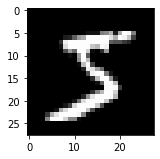

In [ ]:
plt.figure(figsize=[5,5])

plt.subplot(122)
data = np.reshape(train_data[0], (28,28))
label = np.argmax(train_label[0])
plt.imshow(data, cmap='gray')

Attempt CNN using TensorFlow and Keras


In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

batch_size = 128
epochs = 10
dim = 784

#num_category = 10

number_of_classes = len(label_num)   #Just in case any larger numbers could hypothetically be added to dictionary

train_label = keras.utils.to_categorical(train_label, 10)
test_label = keras.utils.to_categorical(test_label, number_of_classes)

train_label.shape, test_label.shape


((60000, 10), (10000, 10))

Build the Model using Keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, ReLU, Softmax, Conv2D, MaxPooling2D, Flatten
from keras.activations import relu, softmax
from keras.utils import np_utils

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
     activation='relu',
     input_shape=(28, 28, 1)))
model.add(Conv2D(64,(3, 3), activation='relu'))
model.add(Conv2D(64,(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(layers.Dense(128))
model.add(Dropout(0.25))
model.add(layers.Dense(10, activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7744)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               9

Split Training data into training and Validation (To speed up Epoch pass timing from 5 mins to 3 mins per Epoch)

In [ ]:
from sklearn.model_selection import train_test_split
train_data,validate_data,train_label,validate_label = train_test_split(train_data, train_label, test_size=0.2)

Training the model with training data:

In [ ]:

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
loss_score = model.fit(train_data,train_label,batch_size=128, epochs=10,validation_data=(validate_data,validate_label))
model.save("epochsave.h5py")
loss = loss_score.history['loss']
val_loss = loss_score.history['val_loss']

score = model.evaluate(test_data,test_label)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
375/375 [==============================] - 40s 26ms/step - loss: 0.3863 - accuracy: 0.8814 - val_loss: 0.0792 - val_accuracy: 0.9751
Epoch 2/10
375/375 [==============================] - 9s 25ms/step - loss: 0.0625 - accuracy: 0.9807 - val_loss: 0.0576 - val_accuracy: 0.9820
Epoch 3/10
375/375 [==============================] - 9s 25ms/step - loss: 0.0441 - accuracy: 0.9870 - val_loss: 0.0502 - val_accuracy: 0.9856
Epoch 4/10
375/375 [==============================] - 9s 24ms/step - loss: 0.0365 - accuracy: 0.9891 - val_loss: 0.0439 - val_accuracy: 0.9867
Epoch 5/10
375/375 [==============================] - 9s 24ms/step - loss: 0.0294 - accuracy: 0.9905 - val_loss: 0.0427 - val_accuracy: 0.9877
Epoch 6/10
375/375 [==============================] - 9s 24ms/step - loss: 0.0254 - accuracy: 0.9923 - val_loss: 0.0410 - val_accuracy: 0.9887
Epoch 7/10
375/375 [==============================] - 9s 24ms/step - loss: 0.0201 - accuracy: 0.9933 - val_loss: 0.0408 - val_accuracy: 0.990

<function matplotlib.pyplot.show>

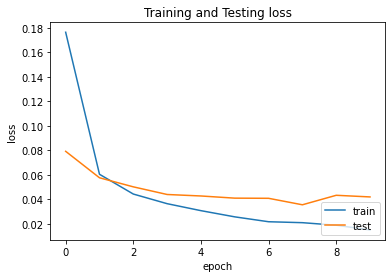

In [ ]:
plt.plot(loss)
plt.plot(val_loss)
plt.title('Training and Testing loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show